# Straight-Line Depreciation Method


In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import unittest

months_per_year = 12
delta_time = 1 / months_per_year # one month expressed in years

## Function of Straight-Line Depreciation and Unit Tests

In [2]:
def depreciation_function(prior_asset_value, original_asset_value, residual_asset_value, service_start_year, current_time, useful_asset_life):
    depreciation_expense =  (original_asset_value - residual_asset_value) \
        * delta_time / useful_asset_life
    #depreciation_rate = annual_straight_line_depreciation / current_time
    next_asset_value = prior_asset_value - depreciation_expense 
    
    # calculate new value
    
    if next_asset_value <= residual_asset_value:
        # worth only the residual
        return residual_asset_value
    else:
        # still worth more than residual
        return next_asset_value

### Unit tests ###

class StraightLineTests(unittest.TestCase):
    
    def test_depreciation_function_month_0_to_1(self):
        depreciated_value = depreciation_function(500.00, 500.00, 50.00, 2000.0, 2000.0, 8.0)
        expected_value = 500.0 - delta_time / 8.0 * 450.0
        self.assertAlmostEqual(depreciated_value, expected_value)
        
        
    def test_depreciation_function_month_96_to_97(self):
        depreciated_value = depreciation_function(50.00 + (500.00 - 50.00) * delta_time / 8.0, 500.00, 50.00, 2000.0, 2008.0, 8.0)
        expected_value = 50.0
        self.assertAlmostEqual(depreciated_value, expected_value)
        
    def test_depreciation_function_one_year(self):
        depreciated_value = depreciation_function(500.00 - (500.00 - 50.00) * 1/8, 500.00, 50.00, 2000.0, 2001.0, 8.0)
        expected_value = 500.0 - (1.0 + delta_time) / 8.0 * 450.0
        self.assertAlmostEqual(depreciated_value, expected_value)
        
testSuite = unittest.TestLoader().loadTestsFromName("__main__.StraightLineTests")
testRunner = unittest.TextTestRunner(verbosity=2)
testRunner.run(testSuite)


test_depreciation_function_month_0_to_1 (__main__.StraightLineTests) ... ok
test_depreciation_function_month_96_to_97 (__main__.StraightLineTests) ... ok
test_depreciation_function_one_year (__main__.StraightLineTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Asset 1
* original cost: $5,000

*  residual value: $250

* useful life: 8 years


In [3]:
times_to_plot = np.arange(2000.0, 2016.0, 1.0 / 12.0)

months_in_16_years = 192

asset_values_to_plot = np.zeros((months_in_16_years,))

asset_values_to_plot[0] = 5000.0

for i in range (1, months_in_16_years):
    # The depreciation_function function is expecting the following arguments:
    # prior_asset_value, original_asset_value, residual_asset_value, service_start_year, current_time, useful_asset_life
    asset_values_to_plot[i] = depreciation_function(asset_values_to_plot[i - 1], 5000.0, 250.0, 2000.0, times_to_plot[i], 8.0)


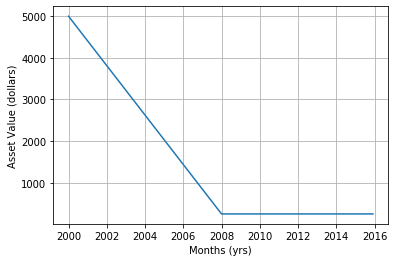

In [4]:
plt.plot( times_to_plot, asset_values_to_plot)

plt.xlabel("Months (yrs)")
plt.ylabel("Asset Value (dollars)")
plt.grid()
plt.show()



## Asset 2
* original cost: $11,000

* residual value: $1,750

* useful life: 12 years

In [5]:
asset_2_values_to_plot = np.zeros((months_in_16_years,))

asset_2_values_to_plot[0] = 11000.0

for i in range (1, months_in_16_years):
    # The depreciation_function function is expecting the following arguments:
    # prior_asset_value, original_asset_value, residual_asset_value, service_start_year, current_time, useful_asset_life
    asset_2_values_to_plot[i] = depreciation_function(asset_2_values_to_plot[i - 1], 11000.0, 1750.0, 2000.0, times_to_plot[i], 12.0)


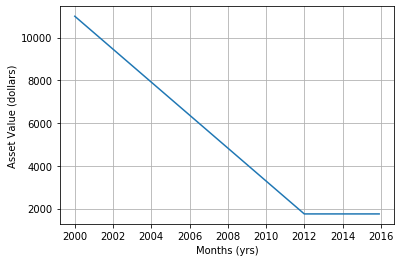

In [6]:
plt.plot( times_to_plot, asset_2_values_to_plot)

plt.xlabel("Months (yrs)")
plt.ylabel("Asset Value (dollars)")
plt.grid()
plt.show()


### Show the Portfolio as a Stacked Plot

We used this example code:

* [Tutorial on Stackplot Feature](https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html)

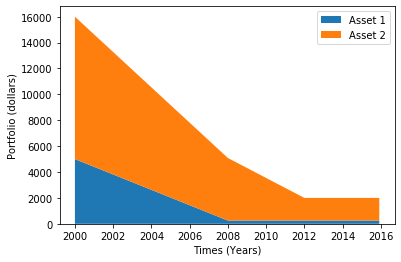

In [7]:
labels = ["Asset 1", "Asset 2"]

figure, axis = plt.subplots()
plt.xlabel("Times (Years)")
plt.ylabel("Portfolio (dollars)")
axis.stackplot(times_to_plot, asset_values_to_plot, asset_2_values_to_plot, labels=labels)
axis.legend(loc='upper right')

plt.show()
